# Predicting Annual Salary for Data Science and STEM Roles based on LEVELS.FYI Data

## 1. Business Understanding

What we need to do:
- Determine business objectives
  - Background
  - Business objectives
  - Business success criteria
- Situation Assessment
  - Inventory of resources
  - Requirements, assumptions, and constraints
  - Risks and contingencies
  - Terminology
  - Cost and benefits
- Determine data mining goal
  - Data mining goals
  - Data mining success criteria
- Product project plan
  - Project plan
  - Initial assessment of tools and techniques

### Determine business objectives
<b> Background, overview and motivation: </b>
Tech-related jobs has been booming when technology went mainstream, especially data scientist role.

According to the Glassdoor 2022, data scientist rank the top 3 best job in America for 7 years running. This ranking is based on the career opportunites rating, number of opening jobs, and the average salaries. The median base salary is $120,000. The job opening were also spiking up from 1,736 in 2016 to 10,071 in 2022. 

However, the ecosystem does not depend on just data scientist alone, it involves upstream and downstream job roles - like product/project managers and software engineers. These jobs are equally important to ensure the democratization of technology to average users. Hence, many people flocked to tech industry.

Unfortunately, the compensation structure vary from one company to another, and was not accessible equally to everyone. [Levels.fyi](https://www.levels.fyi/) was started to democratize the access of information to compensation structure across tech jobs.

*We want to expand this effort by creating an AI model (and subsequently a web app) that enable users to know the estimated annual compensation based on user inputs like year, company, level, title, location, years of experience, years at company and gender.*

<b> Business objective: </b>
To predict the annual salary (including base pay, stock grants and estimated bonuses) for data science and STEM roles using data from [LEVELS.FYI](https://www.levels.fyi/).

<b> Business success criteria: </b> 
A web app that enables user to know the annual compensation based on their input like year, company, level, title, location, years of experience, years at company and gender. and for the next 5 years

<b> Related works: </b> 

<b> 1. Salary Prediction in the IT Job Market with Few High-Dimensional Samples: A Spanish Case Study </b><br>
This paper study predict the salary of IT jobs using data from Tecnoempleo, an e-Recruitment website. The result shows that experience, job stability or certain roles contribute significantly to the salary. Besides, decision trees yield a bettery accuracy (84%) than voting committe based tools.

<b> 2. Gender-based salary differences in academic medicine: a retrospective review of data from six public medical centers in the Western USA </b> <br>
The paper study the effects of gender, rank and speciality of the acedemic medical centers in the Western USA. among the 799 faculty members, it is found that male are paid significantly higher than feamle in general surgery and obstetrics and gynaecology. It is estimated female are paid ~$75,000 lower than their male colleague.

### Situation Assessment

xx

### Determine data mining goal and success criteria

Goals:
- **Create a ML model that is able to predict the annual salary based on user input with MAE <= 1000, RMSE <= 1, Pearson >= 0.9, R2 >= 0.9 (Primary outcome)**
- Create a ML model that is able to predict the annual salary for the same role in the next 5 years (Optional)
- Deploy the ML model into a web app which outputs estimated annual salary to the user, which automatically retrains with new data (Optional)

### Project plan

Initial assessment of tools and techniques:
1. Tools: 
   - Pandas
   - Matplotlib
   - Pandas-profiling
   - Scikit-learn
   - Missingno
   - PyTorch (optional)
   - Streamlit (optional)
   - Heroku (optional)
2. Techniques:
   - CRISP-DM
   - Machine learning
   - Deep learning (optional)

### Some interesting questions to be answered during analysis

1. Many people thinks that tech companies pays well above average and cost of living. Is this true?
2. Many people thinks that you don’t need a degree to work in these tech companies. Is this true?
3. Are women underpaid in these companies?
4. Are non-whites paid lower than whites in these companies?
5. Does years in company affect value of granted stock and bonus?
6. For the same position or job level, does location affect base salary regardless of gender and race?
7. What are the factors impacting the salary of a data scientist?
8. What is the salary trend for data scientist? and its comparison to living cost?
9. What is the predicted salary for Data Scientist in next 5 years?

Surprisingly, the data from [Kaggle](https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries) is different from the latest data pulled from LEVELS.FYI official [JSON API](https://www.levels.fyi/js/salaryData.json) hence we could not answer Question 2, 4 and partially 6 - perhaps to avoid educational and race discrimination.

## 2. Data Understanding

What we need to do:
- Collect initial data
- Describe data
- Explore data
- Verify data quality

### Collect initial data

There are two ways to get the dataset:
1. XLSX file from [Kaggle](https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries)
2. JSON file from [LEVELS.FYI API](https://www.levels.fyi/js/salaryData.json)

In order to get the latest data, we will use the 2nd method as we want to extend this model into a realtime web app later.

In [20]:
import pandas as pd
import requests
data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
df = pd.DataFrame(data)
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,,160,17,9,,,7392,807,1
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,,0,0,0,,,7419,807,2
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,,126,0,0,,,11527,819,3
3,6/14/2017 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,,92799,55371,23178,,,11521,819,5
4,6/16/2017 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,,156335,0,57840,,,1320,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,8/17/2021 8:16:36,Amazon,L6,Product Manager,272,"Seattle, WA",7,0,Analytic,176,51,45,Female,scrielt schwists fuech xauem typaiarty siids q...,11527,819,83870
62638,8/17/2021 8:22:17,Fidelity Investments,L3,Software Engineer,50,"Durham, NC",0,0,Full Stack,43,0,7,Male,pauss jiusts liaop rhiitts proing smiodly splu...,9606,560,83871
62639,8/17/2021 8:24:56,Cisco,Grade 8,Software Engineer,200,"San Jose, CA",3,6,Networking,179,7,14,Male,triasm froidy peusk juieck skaorr,7422,807,83872
62640,8/17/2021 8:26:21,HSBC,GCB5,Software Engineer,86,"New York, NY",10,5,Full Stack,72,0,14,,hypoiarly khoiarts krol sqierg,10182,501,83874


The dataset from Kaggle is slightly different from the LEVELS.FYI API:
- "Education" has been removed
- "Race" has been removed

Perhaps to avoid educational and race discrimination. Hence, we could not answer Question 2 and 4; while we could only try to answer Question 6 partially.

From the dataframe above, we have the following features:
1. timestamp: Date and time when the details was submitted
2. company: Hiring company
3. level: Job grade
4. title: Job title
5. totalyearlycompensation: Annual salary including base salary, value of granted stock and bonus
6. location: Location of the job
7. yearsofexperience: Total number years of experience
8. yearsatcompany: Total number of years in the company
9. tag: NA
10. basesalary: Basic salary
11. stockgrantvalue: Value of granted stock
12. bonus: Total bonus
13. gender: Gender/sex of the hiree
14. otherdetails: Other details submitted
15. cityid: ID of the city where the job was located
16. dmaid: DMA (Designated Market Area) regions are the geographic areas in the U.S. in which local television viewing is measured by Nielsen
17. rowNumber: Instance ID

### Describe data

Let's first describe the data in simple terms, to establish a baseline understanding of the data.

<b> Check and validate data format </b>

But before we can start describing the data, we need to make sure the data are in their intended formats:
- Check the format of each feature
- Check basic statistics of the dataset

In [21]:
# Check the data format using .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                62642 non-null  object
 1   company                  62642 non-null  object
 2   level                    62642 non-null  object
 3   title                    62642 non-null  object
 4   totalyearlycompensation  62642 non-null  object
 5   location                 62642 non-null  object
 6   yearsofexperience        62642 non-null  object
 7   yearsatcompany           62642 non-null  object
 8   tag                      62642 non-null  object
 9   basesalary               62642 non-null  object
 10  stockgrantvalue          62642 non-null  object
 11  bonus                    62642 non-null  object
 12  gender                   62642 non-null  object
 13  otherdetails             62642 non-null  object
 14  cityid                   62642 non-nul

Notice that each feature is in the format of "object" hence we need to change to appropriate format.

<AxesSubplot:>

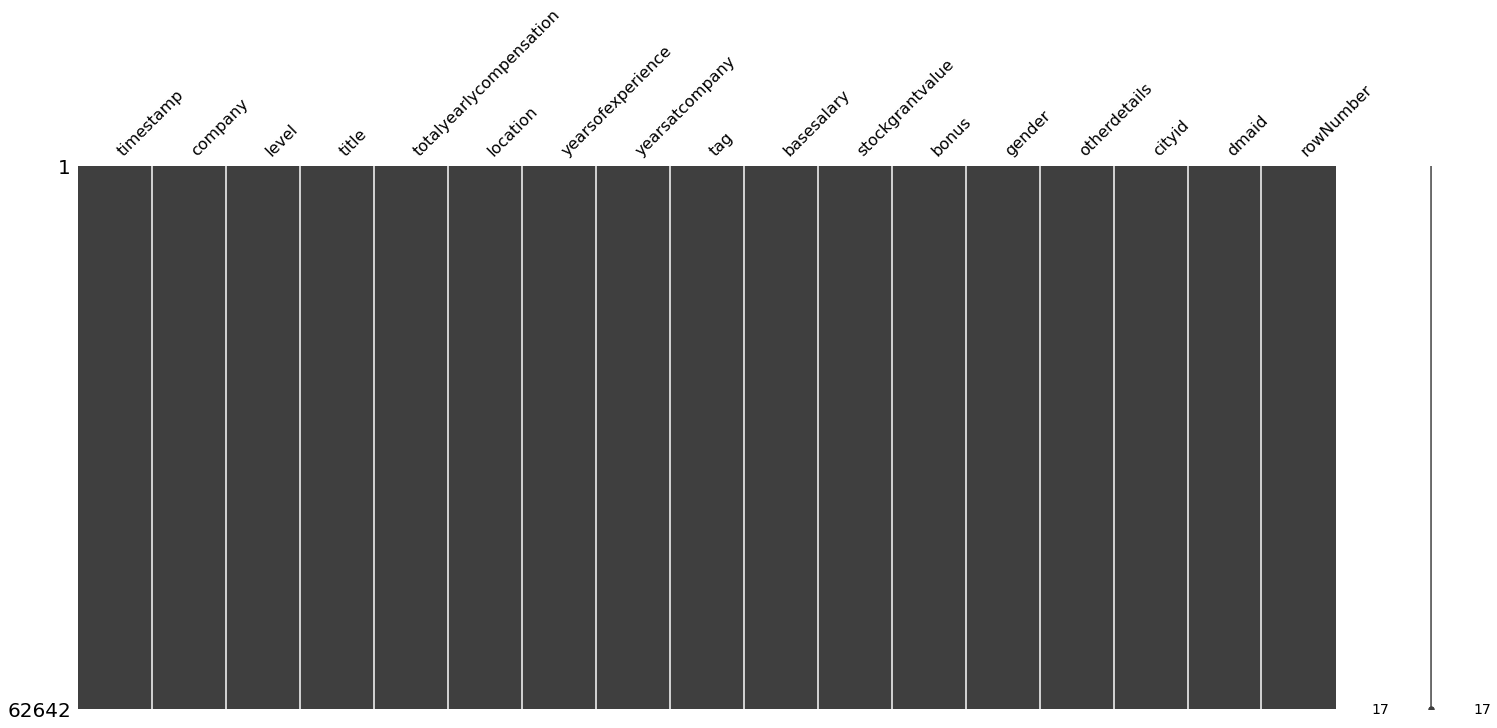

In [22]:
import missingno as msno

msno.matrix(df)

The `missingno` library could not detect any missing values. Perhaps the missing values are in the form of NaN.

In [23]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

for feature in ['company', 'level', 'cityid', 'dmaid', 'location', 'gender']:
    df[feature] = df[feature].astype('category')

for feature in ['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus']:
    df[feature] = pd.to_numeric(df[feature])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                62642 non-null  datetime64[ns]
 1   company                  62642 non-null  category      
 2   level                    62642 non-null  category      
 3   title                    62642 non-null  object        
 4   totalyearlycompensation  62642 non-null  int64         
 5   location                 62642 non-null  category      
 6   yearsofexperience        62642 non-null  int64         
 7   yearsatcompany           62642 non-null  int64         
 8   tag                      62642 non-null  object        
 9   basesalary               62642 non-null  int64         
 10  stockgrantvalue          62642 non-null  int64         
 11  bonus                    62642 non-null  int64         
 12  gender                   62642 n

In [24]:
df.describe(include='all', datetime_is_numeric=True)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
count,62642,62642,62642,62642,6.264200e+04,62642,62642.000000,62642.000000,62642,6.264200e+04,6.264200e+04,62642.000000,62642,62642,62642,62642,62642.000000
unique,NaN,1871,3074,15,NaN,1050,NaN,NaN,3276,NaN,NaN,NaN,5,40133,1045,150,NaN
top,NaN,Amazon,L4,Software Engineer,NaN,"Seattle, WA",NaN,NaN,Full Stack,NaN,NaN,NaN,Male,,11527,807,NaN
freq,NaN,8054,5008,41231,NaN,8701,NaN,NaN,11382,NaN,NaN,NaN,35702,22503,8701,20400,NaN
mean,2020-07-17 03:30:08.313815040,NaN,NaN,NaN,3.175327e+03,NaN,7.191054,2.700616,NaN,1.798145e+03,1.134865e+03,242.317199,NaN,NaN,NaN,NaN,41694.723732
min,2017-06-07 11:33:27,NaN,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,1.000000
25%,2020-01-11 23:12:55.500000,NaN,NaN,NaN,1.160000e+02,NaN,3.000000,0.000000,NaN,8.800000e+01,0.000000e+00,1.000000,NaN,NaN,NaN,NaN,20069.250000
50%,2020-09-21 16:31:21,NaN,NaN,NaN,1.830000e+02,NaN,6.000000,1.000000,NaN,1.310000e+02,2.300000e+01,13.000000,NaN,NaN,NaN,NaN,42019.000000
75%,2021-03-26 15:19:06.500000,NaN,NaN,NaN,2.690000e+02,NaN,10.000000,4.000000,NaN,1.810000e+02,6.400000e+01,27.000000,NaN,NaN,NaN,NaN,63021.750000
max,2021-08-17 08:28:57,NaN,NaN,NaN,3.386013e+06,NaN,90.000000,90.000000,NaN,2.057772e+06,3.140803e+06,384026.000000,NaN,NaN,NaN,NaN,83875.000000


Note: As per [Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html), the `.describe()` method returns `count`, `unique`, `top`, `freq` for object data (strings and timestamps) while it returns `count`, `mean`, `min`, `25%`, `50%`, `75%`, `max`, `std` for numeric data.

Initial glance shows that:
1. Most of the data are from Amazon job roles.
2. Most of the submissions are for level L4, and job title Software Engineer.
3. For totalyearlycompensation, mean and median are quite far away, hence the distribution might be skewed - similarly for basesalary, stockgrantvalue and bonus.
4. Most of the submissions are for job roles located in Seattle, WA.
5. Mean years of experience is around 7 years, with median of 6 years.
6. Mean years at company is 2.7 years, while median is around 1 year - signifying that job hopping is very common for tech roles, where people typically stayed in a company for 1 year.
7. Most of the data are male - showing gender disparity in tech sector.
8. The cityid that appears most is 11527 while 807 for dmaid. Surprisingly, Nielsen's DMA ID only ranges from 1 to 210 hence further checking needed for these features.

Although `df.info()` shows we have no missing values, let's do a further check before we proceed to the next stage. 

Previously, we used `missingno` library and it could not detect any missing values. Let's use `.isna()` on each feature instead.

In [25]:
df.isna().sum()

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
otherdetails               0
cityid                     0
dmaid                      0
rowNumber                  0
dtype: int64

This confirms the findings we found in `missingno` library - there are no missing values in the dataset.

Now that we know how many values are missing, let's understand more about the data using `pandas-profiling`.

In [26]:
import pandas_profiling as pp

pprofile = df.profile_report(title="Levels.fyi Salary Data Report")

In [27]:
# pprofile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
# pprofile.to_file("Levelsfyi Salary Data Report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Let's open the HTML file in another browser tab to see the report.

#### Overview section
In the Overview tab, we see:
- 0 missing cells
- 0 duplicate rows
- 1 datetime variable, 8 categorical variables and 8 numeric variables

In the Alerts tab, we see:
- company, level, location, tag, otherdetails, dmaid has high cardinality which means there are many distinct values
- a bunch of features that has high correlation with each other (we check that more in feature selection later)
- totalyearlycompensation, basesalary, stockgrantvalue and bonus are highly skewed
- totalyearlycompensation, yearsofexperience, yearsofcompany, basesalary, stockgrantvalue, and bonus has a substantial percentage of zeros

From here, we get a more deeper glance on how the data look like.

#### Variables section
- timestamp: Minimal entries from 2017 to 2018, but increase in trend after that
- company: Most entries in sequence - Amazon, Microsoft, Google, Facebook, Apple
- level: Most entries are L4, L5 then L3. 
- title: Ignored as job title is too unstructured and job grade has been reflected in `level`
- totalyearlycompensation: As indicated in "Alerts", this variable is highly correlated and skewed. This require extensive checks and cleaning later especially for entries not following the XXXk convention
- location: Most of the jobs are in (sequence) Seattle WA, San Francisco CA, New York NY, Redmond WA and Mountain View CA. Require checking on correlation with target variable
- yearsofexperience: There are uncommon extreme values - 90 years of experience, outlier removal needed
- tag: Most common entries are "full stack", "distributed system", "API dev", "ML/AI" and "web dev". Surprisingly ML/AI falls at 4th place hence we can deduce that not all jobs are all ML/AI, there are still a lot of software jobs as well
- basesalary, stockgrantvalue, bonus: Ignored as this is part of `totalyearlycompensation`. Just require checking that the sum equals `totalyearlycompensation` 
- gender: Mostly male, then followed by blanks then female. Require check if this feature is highly correlated with pay.
- otherdetails: Ignored as this is too unstructured
- cityid: Not really familiar with US city ID. Require further research and checking if correlated to target variable
- dmaid: Referring to [Nielsen's Designated Market Areas](https://www.facebook.com/business/help/1501907550136620). Require checking if DMA name aligned with `cityid` and `location`.
- rownumber: Ignored as this is just instance ID. However, further checking required.

#### Correlations section (Only for numeric variables)
Note: Ignore basesalary, stockgrantvalue and bonus as the summation of three equals totalyearlycompensation.
1. Spearman's: totalyearlycompensation is...
   - Correlated with yearsofexperience
   - Slightly correlated with yearsatcompany
2. Pearson's: totalyearlcompensation is...
   - Slightly correlated with yearsofexperience and yearsatcompany
3. Kendall's: totalyearlycompensation is...
   - Correlated with yearsofexperience
   - Slightly correlated with yearsatcompany
4. Phik: totalyearlycompensation is...
   - Slightly correlated with yearsofexperience and yearsatcompany
   - Slightly to no correlation with gender
   - Ignore cityid as cityid is not an ordinal data
   
#### Missing values
There are no missing values.


#### What we should do next:
1. totalyearlycompensation, basesalary, stockgrantvalue, bonus
   - Examine extreme (0 and large) values and check the for reported salary on the Internet for that particular job grade, and then decide if needed to be removed
   - Ensure values are consistent following XXXk format
   - Plot histogram for entry frequency - to check if there are imbalanced data
2. yearsofexperience
   - Check for extreme values - >40 years experience - check whether aligns with job grade
   - Plot totalyearlycompensation with yearsofexperience for each company
3. yearsatcompany
   - Check for extreme values - >40 years at company - check whether aligns with job grade
   - Decide if remove extreme value
   - Plot totalyearlycompensation with yearsofexperience for each company
4. gender
   - Plot histogram for entry frequency - to check imbalanced data
   - Decide to replace values other than Male and Female to Unknown or other values
5. companies
   - Plot frequency of entries for all companies - to check imbalanced data
   - Plot average and median totalyearlycompensation of each company - to check if there are substantial salary difference across company
   - Plot average and median totalyearlycompensation for all job locations for each company
   - Check if there are typo in company name
6. level
   - Study how US tech company job ranks - to change job titles into corresponding job ranks
   - Plot average and median totalyearlycompensation for each job level across companies - to check if there are substantial salary difference for the same job grade across companies
   - Plot the frequency of each job grade - to check imbalanced data
7. location
   - Plot in map the number of entries for each location - to check which location has most entries
   - Tabulate the number of entries in a table - row: companies, column: location - to check if each companies has multiple locations
   - Plot average and median totalyearlycompensation for each location
   - Check for typo in location name
8. cityid, dmaid
    - Study how US city and DMA ID works
    - Check if aligns with the location and real city
9. tag
   - Check for percentage of blanks - decide if to include in analysis or not
   - Plot totalyearlycompensation wrt tags and job grade - to check for same job grade, is there salary difference for different job domain
10. title
    - Ignored
11. otherdetails
    - Ignored

### Data Cleaning

Before the data is suitable to be explored, we need to ensure the data has been cleaned.

#### For totalyearlycompensation, basesalary, stockgrantvalue, bonus
   - Examine extreme (0 and large) values and check the for reported salary on the Internet for that particular job grade, and then decide if needed to be removed
   - Ensure values are consistent following XXXk format
   - Plot histogram for entry frequency - to check if there are imbalanced data

In [36]:
'''
Examine extreme (0 and large) values and check the for reported salary 
on the Internet for that particular job grade, and then decide 
if needed to be removed
'''

df[(df['totalyearlycompensation'] > 10000) | (df['totalyearlycompensation'] == 0)]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
1,2017-06-10 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,,0,0,0,,,7419,807,2
3,2017-06-14 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,,92799,55371,23178,,,11521,819,5
4,2017-06-16 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,,156335,0,57840,,,1320,0,6
6,2017-06-20 10:58:51,Microsoft,60,Software Engineer,0,"Mountain View, CA",7,2,,0,0,0,,,7322,807,9
7,2017-06-20 18:49:59,Amazon,L5,Software Engineer,153939,"Seattle, WA",3,3,,101828,52111,0,,,11527,819,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11790,2019-09-17 00:07:31,Apple,ICT3,Software Engineer,0,"Cupertino, CA",5,6,ML / AI,0,0,0,,,7158,807,14973
15742,2020-01-14 16:53:56,Facebook,E4,Software Engineer,0,"Menlo Park, CA",2,1,Full Stack,0,0,0,Female,blieny schweuch phaiar hydruiesp,7300,807,20181
15759,2020-01-14 21:41:27,IBM,Senior Technical Staff Member,Software Engineer,0,"San Francisco, CA",9,12,Distributed Systems (Back-End),0,0,0,Other,,7419,807,20204
15764,2020-01-14 23:09:20,Spotify,Staff Engineer,Software Engineer,0,"New York, NY",10,0,Distributed Systems (Back-End),0,0,0,,,10182,501,20210


### Explore data

Data exploration must be aligned with the project objective - to predict the annual salary (including base pay, stock grants and estimated bonuses) for data science and STEM roles using data from [LEVELS.FYI](https://www.levels.fyi/).

Hence we prioritise the following questions:
1. What are the features that will affect annual compensation offered?
2. How does those features change wrt annual compensation offered?
3. What are the irrelevant (and uncorrelated) features that we can drop?

From here, we can extend to these questions:
1. Many people thinks that tech companies pays well above average and cost of living. Is this true?
2. For the same position and job level, does 2021 compensation higher than in 2017? If yes, is it aligned with inflation?
3. Are women underpaid in these companies? If yes, by how much?
4. Does different company offer differently for the same position or there is no disparity?
5. Does years in company affect total compensation? If yes, which part of compensation was affected - base salary, stock value or bonus?
6. For the same position or job level, does location affect total compensation regardless of gender?

Good to know:
1. What are the factors impacting the salary of a data scientist?
2. What is the salary trend for data scientist? and its comparison to living cost?
3. What is the predicted salary for data scientist in next 5 years?

## References

Best Jobs in America 2022 Employees' Choice (2022). Glassdoor. Retrived on May 3, 2022 from
https://www.glassdoor.com/List/Best-Jobs-in-America-LST_KQ0,20.htm

Data Scientist Salary-The Ultimate Guide for 2021 (2022). ProjectPro. Retrived on May 3, 2022 from https://www.projectpro.io/article/data-scientist-salary-the-ultimate-guide-for-2021/218

Davenport, T H. & Patil, DJ. (2012). Data Scientist: The Sexiest Job of the 21st Century. *HARVARD BUSINESS REVIEW*. Retrieved on 3 May, 2022 from https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century

Martin, I., Mariello, A., Battiti, R. & Hernandez, J A. (2018). Salary Prediction in the IT Job Market with Few High-Dimensional Samples: A Spanish Case Study. *International Journal of Computational Intelligence Systems, 11, 1192-1209*. https://libkey.io/libraries/2611/articles/225996272/full-text-file   
    
    
Miller, H., Seckel, Ea., White, CL., et al. (2021). Gender-based salary differences in academic medicine: a retrospective review of data from six public medical centers in the Western USA. http://dx.doi.org/10.1136/bmjopen-2021-059216
    
Seaman, A. (2021). LinkedIn Jobs on the Rise: 15 opportunities that are in demand and hiring now. Retrieved on May 3, 2022 from https://www.linkedin.com/pulse/linkedin-jobs-rise-15-opportunities-demand-hiring-now-andrew-seaman/